# TP Nro 1: Programación básica 2021 1C
### Integrantes: Franco Areco - Luna Isaias - Franco Rebora

Importacion de librerias usadas a lo largo del trabajo:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## <u>Ejercicio 1</u>:
Generar una señal discreta, a partir de una señal $x(t)$, de un 1 segundo de duración, compuesta por
tres funciones $x_1(t)+ x_2(t) + x_3(t)$ como se definen a continuación:

$x_1 (t) = 2$ <br>
$x_2 (t) = cos(2 \pi f_2 t) e^{- \frac{(t-\mu_2)^2}{2\sigma_2^2}}\;\;\;\;\;\;\;\;f_2 = 10kHz$ $\mu_2 = 0.2s$ $\sigma_2 = 0.05s$<br> 
$x_3 (t) = sen(2 \pi f_2 t) e^{- \frac{(t-\mu_3)^2}{2\sigma_3^2}}\;\;\;\;\;\;\;\;f_3 = 0.5kHz$ $\mu_3 = 0.7s$ $\sigma_3 = 0.07s$<br>


En todos los casos, la frecuencia de muestreo es <b>$f_s = 44.1$kHz </b>. Graficar cada señal por separado y
la señal total.

#### Se definen las variables y se realizan las operaciones:

In [3]:
t = 1
fs = 44100
vector_t = np.linspace(0,t,t*fs)

f2 = 10000
u2 = 0.2
sigma2 = 0.05
exp2 = ((vector_t-u2)**2)/(2*(sigma2**2))

f3 = 500
u3 = 0.7
sigma3 = 0.07
exp3 = ((vector_t-u3)**2)/(2*(sigma3**2))


x1 = 2*np.ones_like(vector_t)
x2 = np.cos(2*np.pi*f2*vector_t)*(np.e**(-exp2))
x3 = np.sin(2*np.pi*f3*vector_t)*(np.e**(-exp3))

#### Plot:

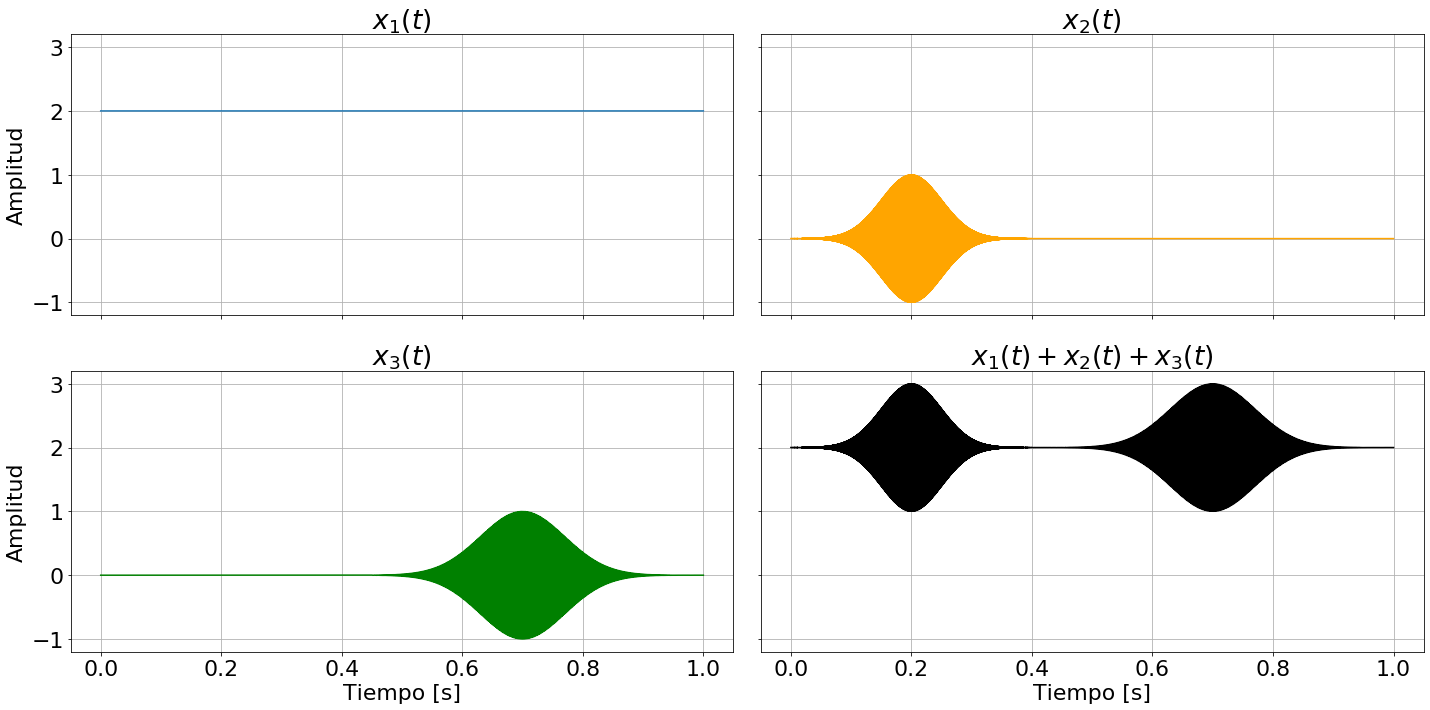

In [4]:
plt.rcParams.update({'font.size': 22})
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=[20, 10])
axs[0, 0].plot(vector_t, x1)
axs[0, 0].set_title('$x_1(t)$')
axs[0, 1].plot(vector_t, x2, color='orange')
axs[0, 1].set_title('$x_2(t)$')
axs[1, 0].plot(vector_t, x3, color='green')
axs[1, 0].set_title('$x_3(t)$')
axs[1, 1].plot(vector_t, x1+x2+x3, color='black')
axs[1, 1].set_title('$x_1(t) + x_2(t) + x_3(t)$')
fig.tight_layout()

axs.flat[0].set(ylabel='Amplitud')
axs.flat[2].set(ylabel='Amplitud', xlabel='Tiempo [s]')
axs.flat[3].set(xlabel='Tiempo [s]')


for ax in axs.flat:
    ax.grid()

## <u>Ejercicio 2</u>:
Implementar funciones que permitan calcular el valor medio $\mu$, la desviación respecto del promedio d, la desviación estándar $\sigma$ y el valor RMS de acuerdo a las definiciones dadas debajo para una señal de entrada discreta $x[n]$ de longitud finita $N$. Estas funciones deben estar disponibles para reutilizarse en otros puntos.

Valor medio: $\mu = \frac{1}{N} \sum_{n=0}^{N-1} x[n]$ <br>
Desvío medio: $d = \frac{1}{N} \sum_{n=0}^{N-1} |x[n]-\mu|$ <br>
Desvío estándar: $\sigma = \sqrt{\frac{1}{N-1} \sum_{n=0}^{N-1} |(x[n]-\mu)^2|}\;\;\;\;\;\;\;\;$Varianza:$\sigma^2$<br>
RMS: $\sigma = \sqrt{\frac{1}{N} \sum_{n=0}^{N-1} |(x[n])^2|}$

Aplicar cada una de las funciones anteriores a la señal generada en el punto 1 y mostrar los
resultados.

Se definen las funciones:

In [5]:
def valor_medio(x):
    u = (1/len(x))*np.sum(x)
    return u

def desvio_medio(x):
    N = len(x)
    u = (1/N)*np.sum(x)
    d = (1/N)*np.sum(abs(x-u))
    return d

def desvio_estandar(x):
    N = len(x)
    u = (1/N)*(np.sum(x))
    tau = np.sqrt((1/(N-1))*(np.sum(abs((x-u)**2))))
    return tau 

def rms(x):
    N = len(x)
    rms = np.sqrt((1/N)*np.sum(abs(x**2)))
    return rms
    

In [6]:
t = 1
fs = 44100
vector_t = np.linspace(0,t,t*fs)

f2 = 10000
u2 = 0.2
sigma2 = 0.05
exp2 = ((vector_t-u2)**2)/(2*(sigma2**2))

f3 = 500
u3 = 0.7
sigma3 = 0.07
exp3 = ((vector_t-u3)**2)/(2*(sigma3**2))


x1 = 2*np.ones_like(vector_t)
x2 = np.cos(2*np.pi*f2*vector_t)*(np.e**(-exp2))
x3 = np.sin(2*np.pi*f3*vector_t)*(np.e**(-exp3))

valor1 = valor_medio(x1)
valor2 = valor_medio(x2)
valor3 = valor_medio(x3)

desvio_medio1 = desvio_medio(x1)
desvio_medio2 = desvio_medio(x2)
desvio_medio3 = desvio_medio(x3)

desvio_estandar1 = desvio_estandar(x1)
desvio_estandar2 = desvio_estandar(x2)
desvio_estandar3 = desvio_estandar(x3)

rms1 = rms(x1)
rms2 = rms(x2)
rms3 = rms(x3)

## <u>Ejercicio 3 </u>:
Generar señales aleatorias, normalmente distribuidas (Gaussiana), con valor medio nulo y
desviación estándar unitaria, para simular una señal de ruido. Calcular para las longitudes (N) dadas
en la tabla, la desviación estándar en cada caso y determinar la diferencia porcentual entre lo
calculado y lo esperado ($\sigma$ = 1). Utilizar funciones ya existentes para la generación de las señales
aleatorias.

<table style="border-collapse: collapse; border: none; border-spacing: 0px;">
	<tr>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			<b>&nbsp; &nbsp; &nbsp; &nbsp;N&nbsp; &nbsp; &nbsp; &nbsp;</b>
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			<b>$\sigma$</b>
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			<b>%</b>
		</td>
	</tr>
	<tr>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: right; padding-right: 3pt; padding-left: 3pt;">
			<i>5</i>
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: center; padding-right: 3pt; padding-left: 3pt;">
			&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp;
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); padding-right: 3pt; padding-left: 3pt;">
			&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp;
		</td>
	</tr>
	<tr>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: right; padding-right: 3pt; padding-left: 3pt;">
			<i>10</i>
			<br>
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: center; padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); padding-right: 3pt; padding-left: 3pt;">
			&nbsp; &nbsp; &nbsp; &nbsp;
		</td>
	</tr>
	<tr>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: right; padding-right: 3pt; padding-left: 3pt;">
			<i>100</i>
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: center; padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); padding-right: 3pt; padding-left: 3pt;">
		</td>
	</tr>
	<tr>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: right; padding-right: 3pt; padding-left: 3pt;">
			1000
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: center; padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); padding-right: 3pt; padding-left: 3pt;">
		</td>
	</tr>
	<tr>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: right; padding-right: 3pt; padding-left: 3pt;">
			10000
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: center; padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); padding-right: 3pt; padding-left: 3pt;">
		</td>
	</tr>
	<tr>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: right; padding-right: 3pt; padding-left: 3pt;">
			100000
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); text-align: center; padding-right: 3pt; padding-left: 3pt;">
		</td>
		<td style="border-width: 1px; border-style: solid; border-color: rgb(128, 128, 128); padding-right: 3pt; padding-left: 3pt;">
		</td>
	</tr>
</table>

In [7]:
v1 = np.random.randn(5)
v2 = np.random.randn(10)
v3 = np.random.randn(100)
v4 = np.random.randn(1000)
v5 = np.random.randn(10000)
v6 = np.random.randn(100000)

d1 = desvio_estandar(v1)
d2 = desvio_estandar(v2)
d3 = desvio_estandar(v3)
d4 = desvio_estandar(v4)
d5 = desvio_estandar(v5)
d6 = desvio_estandar(v6)

p1 = d1*100
p2 = d2*100
p3 = d3*100
p4 = d4*100
p5 = d5*100
p6 = d6*100

print('''Para la cantidad de muestras N = 5:\n
      La desviacion estandar es:''', d1,
      '\n\tCon un porcentaje de: ', round(p1,2), '%\n')
print('''Para la cantidad de muestras N = 10:\n
      La desviacion estandar es:''', d2,
      '\n\tCon un porcentaje de: ', round(p2,2), '%\n')
print('''Para la cantidad de muestras N = 100:\n
      La desviacion estandar es:''', d3,
      '\n\tCon un porcentaje de: ', round(p3,2), '%\n')
print('''Para la cantidad de muestras N = 1000:\n
      La desviacion estandar es:''', d4,
      '\n\tCon un porcentaje de: ', round(p4,2), '%\n')
print('''Para la cantidad de muestras N = 10000:\n
      La desviacion estandar es:''', d5,
      '\n\tCon un porcentaje de: ', round(p5,2), '%\n')
print('''Para la cantidad de muestras N = 100000:\n
      La desviacion estandar es:''', d6,
      '\n\tCon un porcentaje de: ', round(p6,2), '%\n')

Para la cantidad de muestras N = 5:

      La desviacion estandar es: 0.9846455000486095 
	Con un porcentaje de:  98.46 %

Para la cantidad de muestras N = 10:

      La desviacion estandar es: 1.0052193849735243 
	Con un porcentaje de:  100.52 %

Para la cantidad de muestras N = 100:

      La desviacion estandar es: 1.2112532670525031 
	Con un porcentaje de:  121.13 %

Para la cantidad de muestras N = 1000:

      La desviacion estandar es: 0.9984181269663449 
	Con un porcentaje de:  99.84 %

Para la cantidad de muestras N = 10000:

      La desviacion estandar es: 1.0056844028758982 
	Con un porcentaje de:  100.57 %

Para la cantidad de muestras N = 100000:

      La desviacion estandar es: 1.0047078063017545 
	Con un porcentaje de:  100.47 %

